Data path: Data\Customer-Churn-Records.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Shape: (10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null 

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


Missing values per column:
 RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64
Total duplicates: 0
Dropping columns: ['RowNumber', 'CustomerId', 'Surname']
Target distribution (Exited):


Exited
0    0.7962
1    0.2038
Name: ratio, dtype: float64

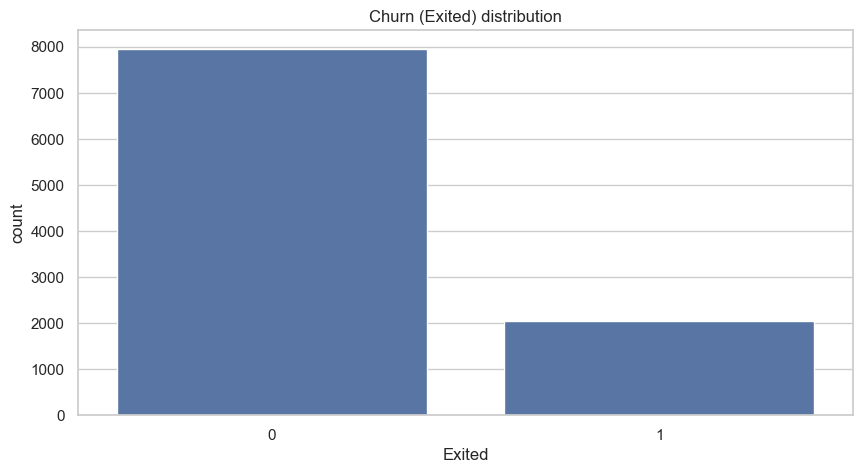

Categorical columns: ['Geography', 'Gender', 'Card Type']

Column: Geography


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

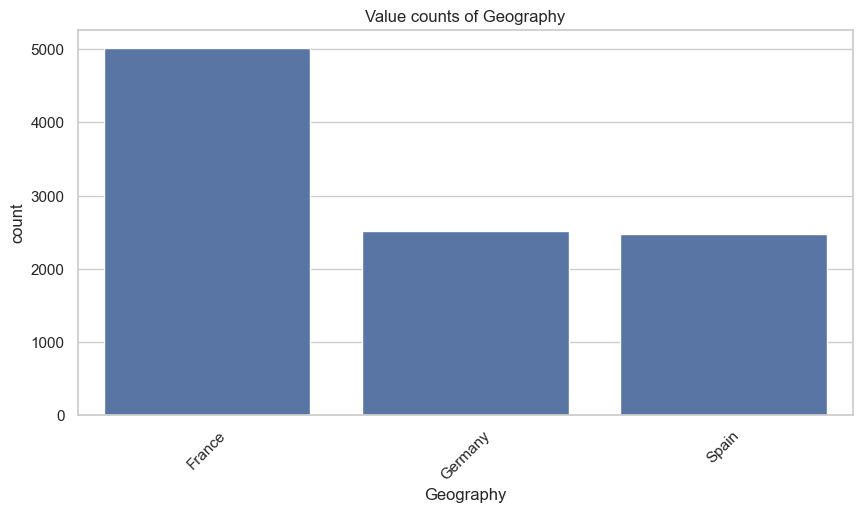


Column: Gender


Gender
Male      5457
Female    4543
Name: count, dtype: int64

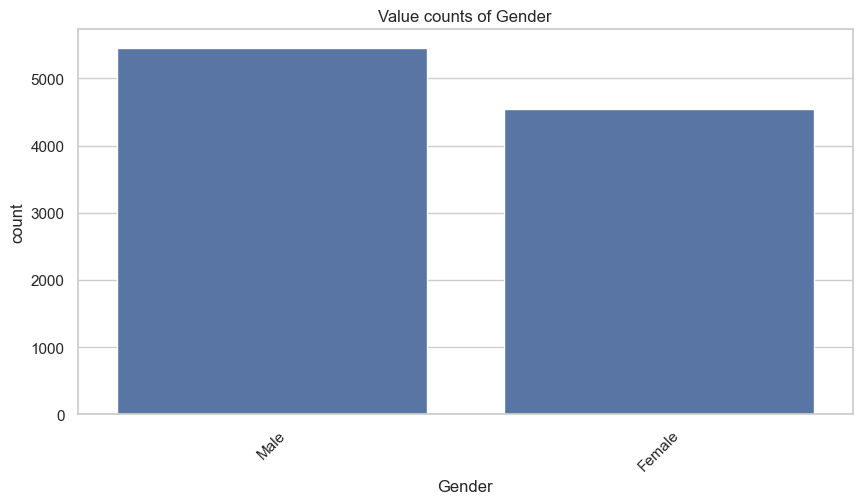


Column: Card Type


Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

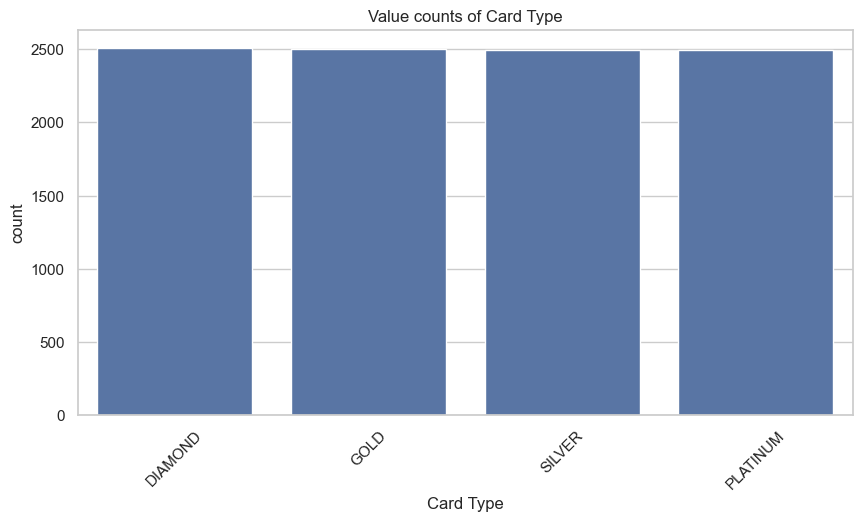

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


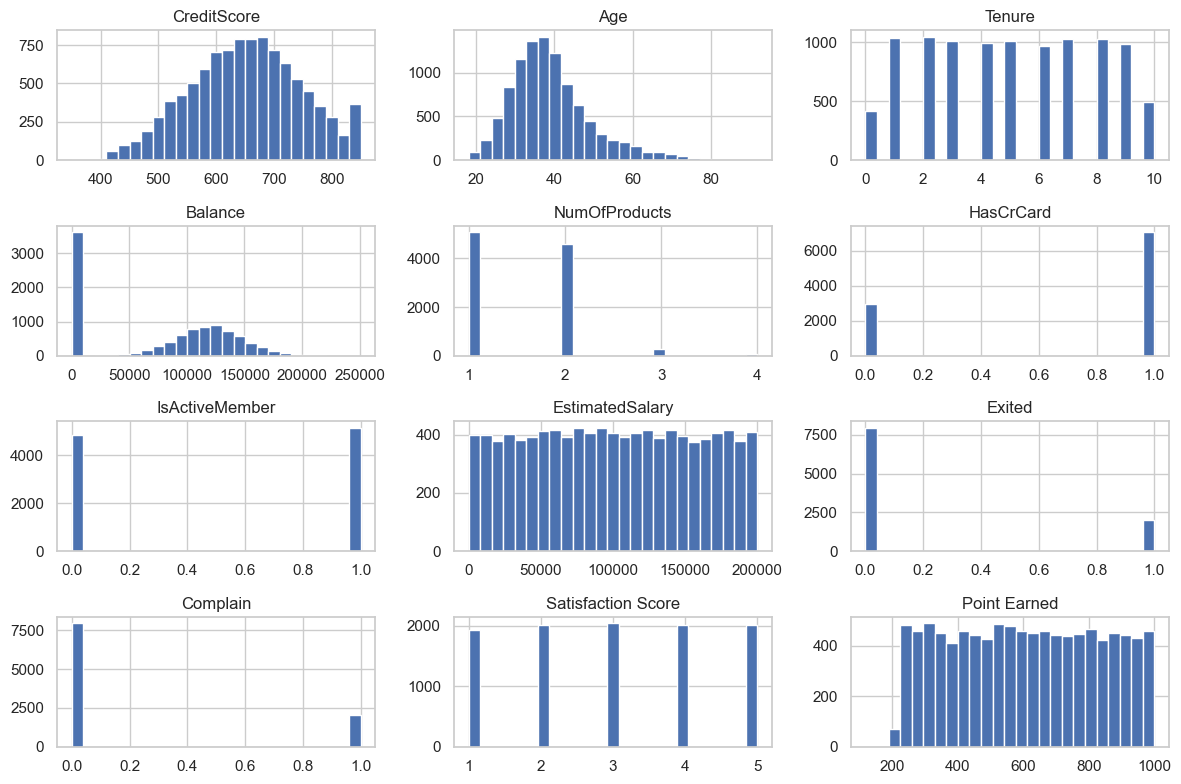

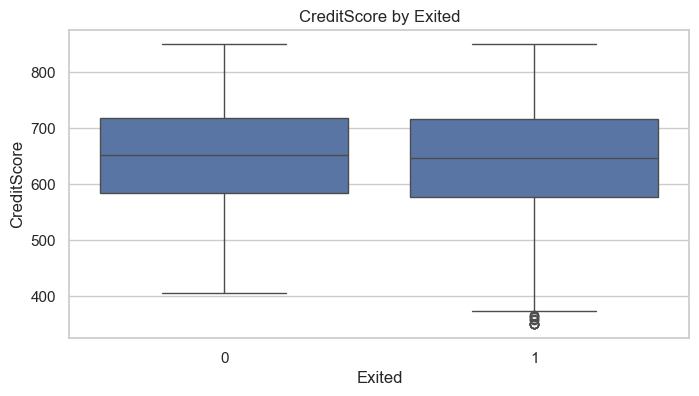

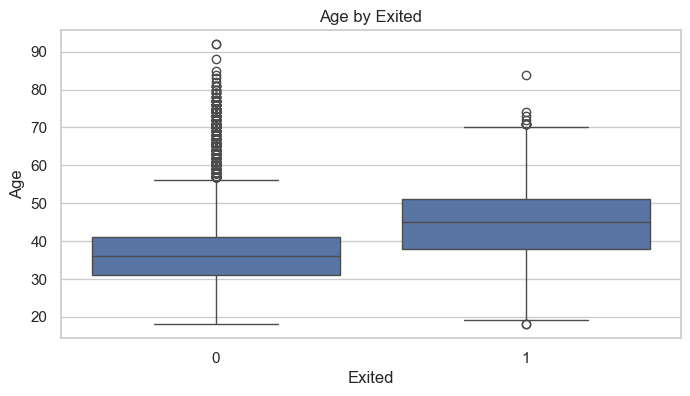

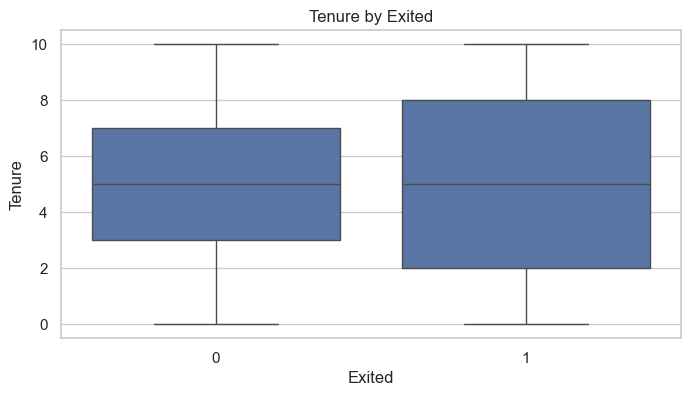

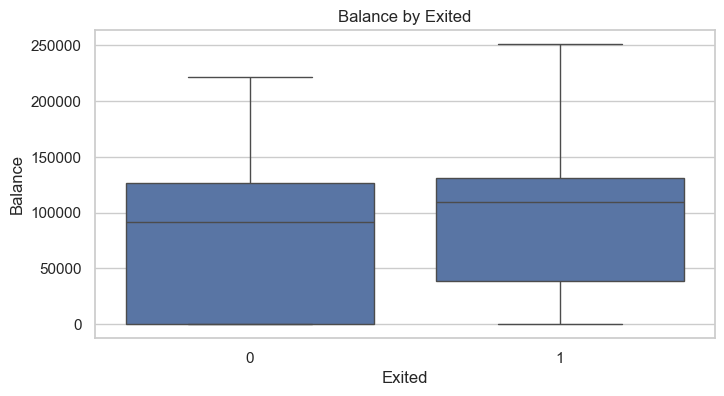

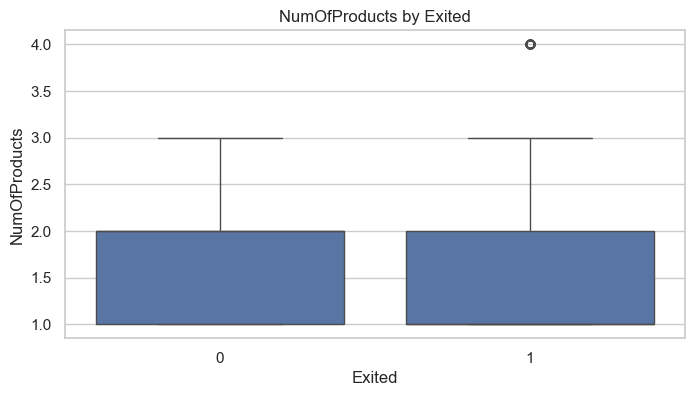

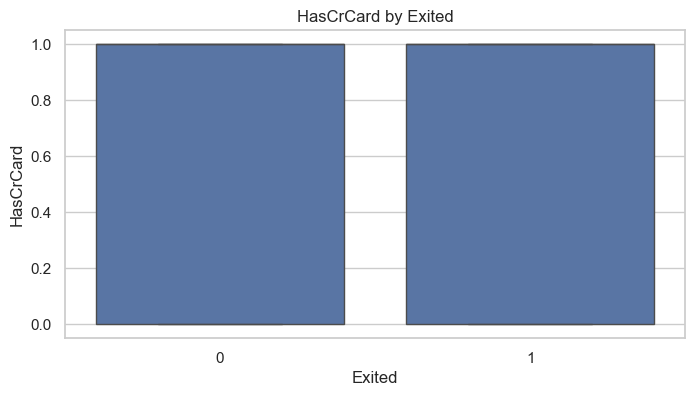

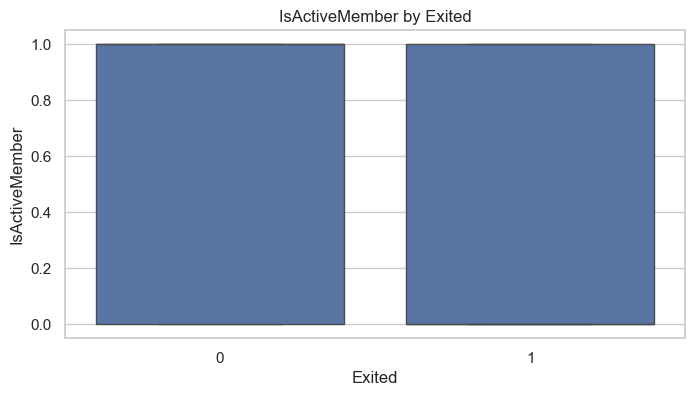

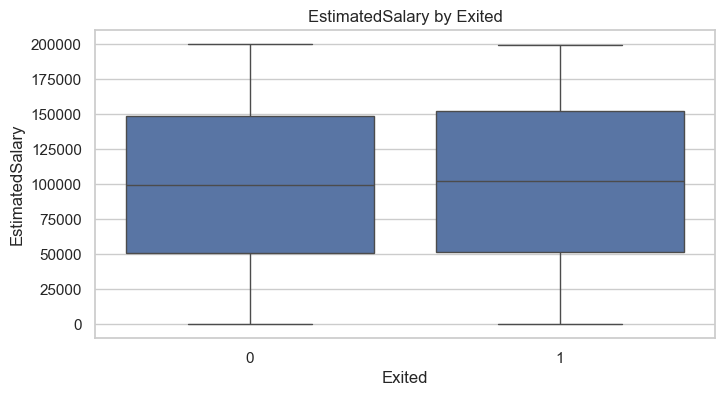

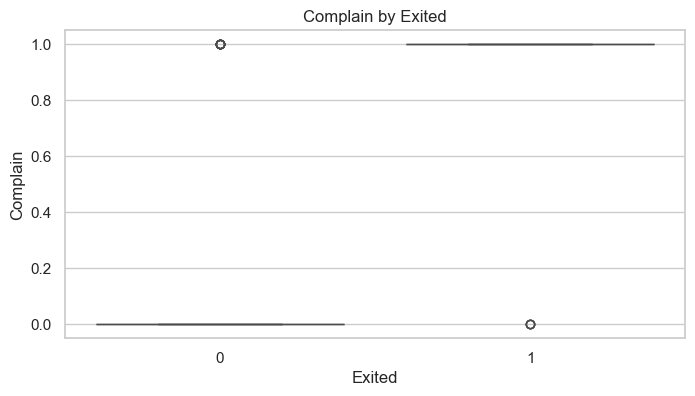

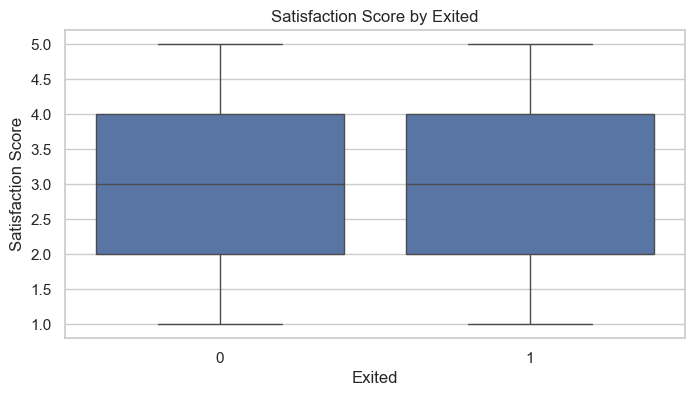

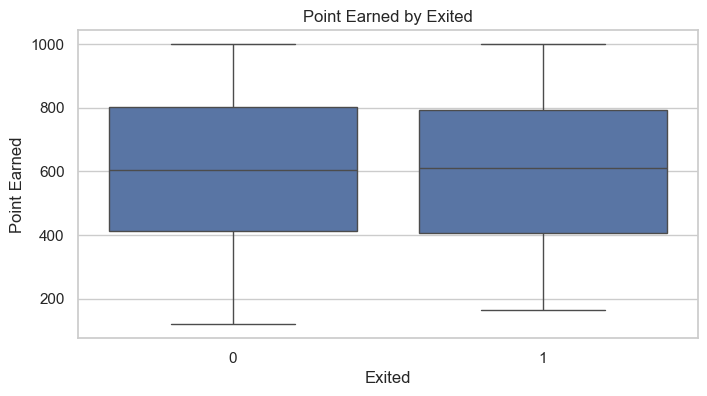

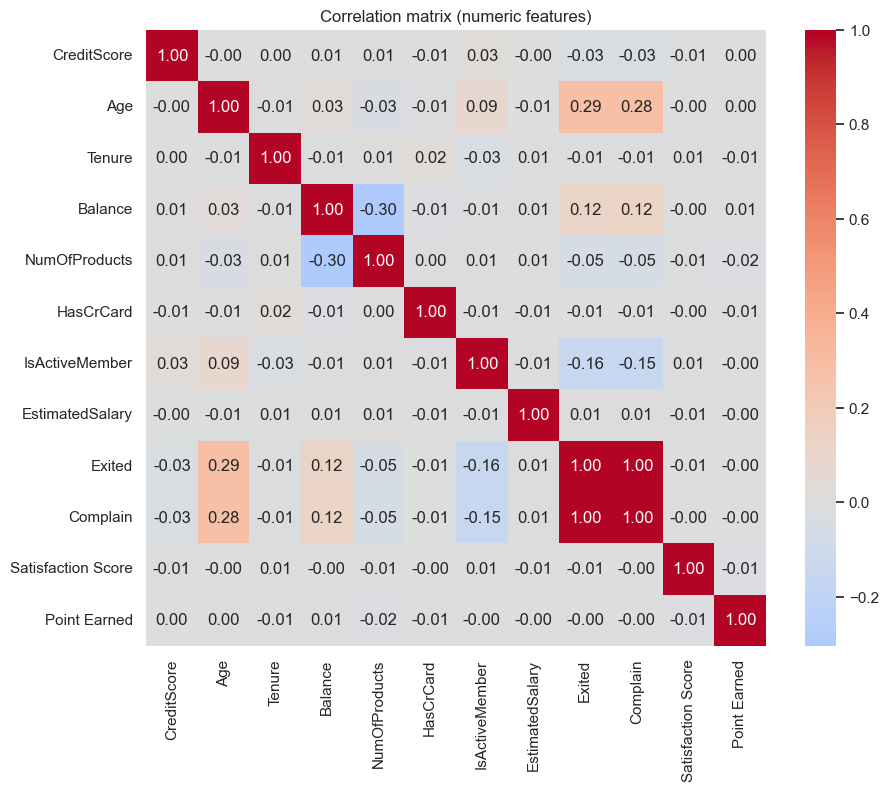

Top features correlated with target:
 Exited             1.000000
Complain           0.995693
Age                0.285296
IsActiveMember     0.156356
Balance            0.118577
NumOfProducts      0.047611
CreditScore        0.026771
Tenure             0.013656
EstimatedSalary    0.012490
HasCrCard          0.006976
Name: Exited, dtype: float64
Plotting pairplots for: ['Complain', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']


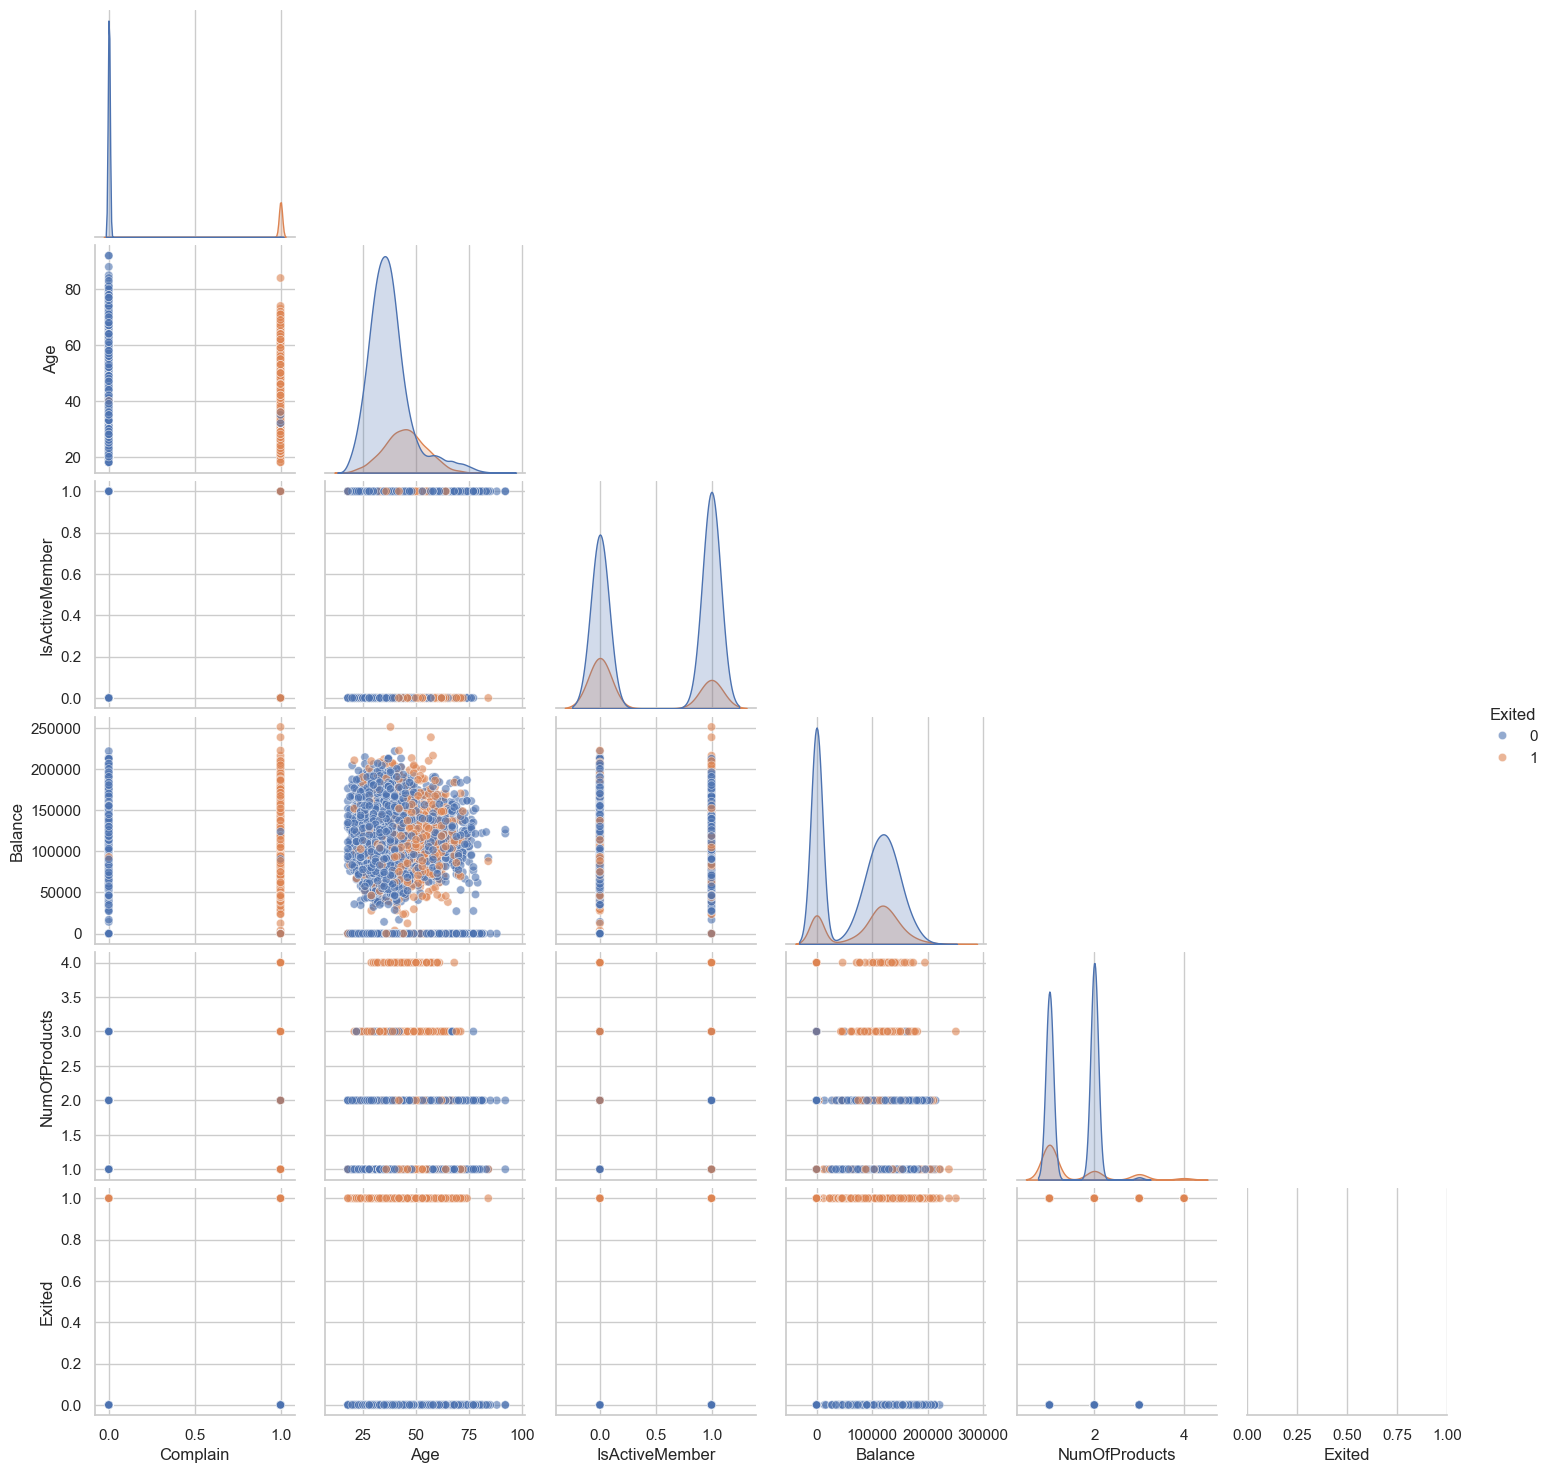

,churn_rate
Geography,
Germany,0.324432
Spain,0.166734
France,0.161747


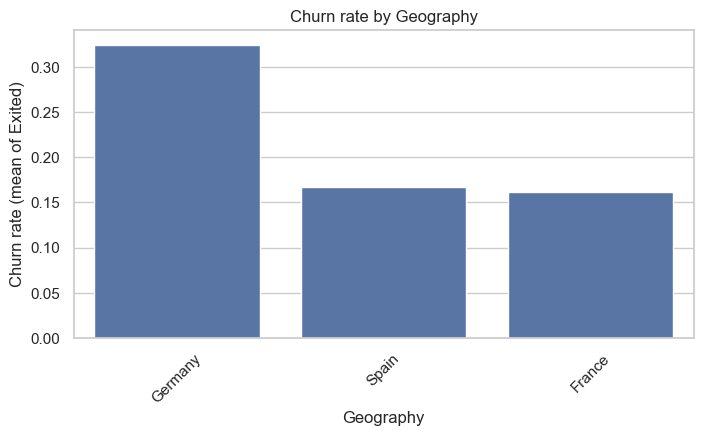

,churn_rate
Gender,
Female,0.250715
Male,0.164743


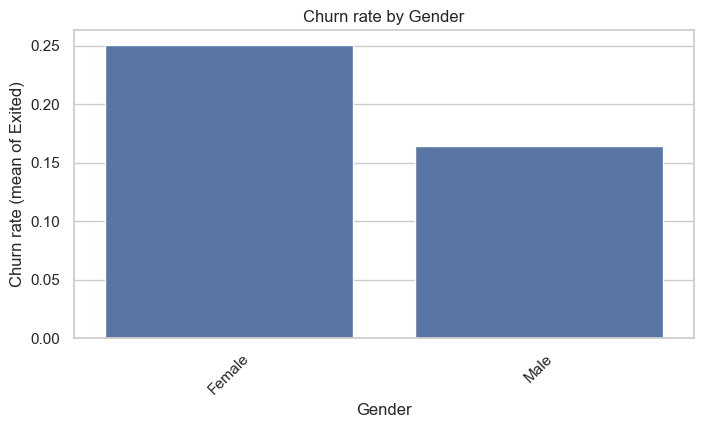

,churn_rate
Card Type,
DIAMOND,0.217790
PLATINUM,0.203607
SILVER,0.201122
GOLD,0.192646


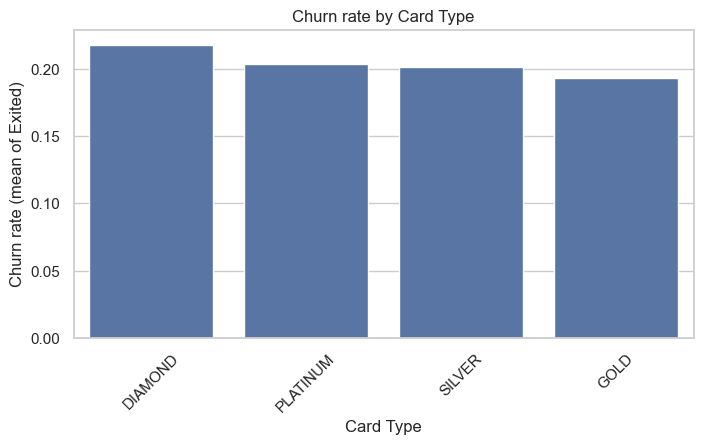

Counts:
 Exited
0    7962
1    2038
Name: count, dtype: int64
Imbalance ratio (min/max): 0.256
Significant imbalance — consider stratified split and/or resampling (SMOTE/undersample) when training.


,Age,Age_bin
0,42,35-45
1,41,35-45
2,42,35-45
3,39,35-45
4,43,35-45


,Balance,HighBalance
0,0.00,0
1,83807.86,0
2,159660.80,1
3,0.00,0
4,125510.82,1


Saved sample and correlation to artifacts
Wrote preprocessing checklist.
EDA complete. Artifacts saved in: artifacts


In [9]:
# %% 0. Requirements (run once in terminal)
# pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

# %% 1. Imports and path setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

# adjust path to your project structure (relative)
# DATA_PATH = Path(__file__).parent / "Data" / "Customer-Churn-Records.csv"  # if running in .py
# If running inside notebook from project root:
DATA_PATH = Path("Data") / "Customer-Churn-Records.csv"

print("Data path:", DATA_PATH)
if not DATA_PATH.exists():
    raise FileNotFoundError(f"{DATA_PATH} not found. Put your CSV in the Data/ folder or update path.")

df = pd.read_csv(DATA_PATH)
# %% 2. Quick peek
display(df.head())
print("Shape:", df.shape)
display(df.info())
display(df.describe(include='all').transpose())

# %% 3. Missing values & duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Total duplicates:", df.duplicated().sum())

# %% 4. Clean up / drop unneeded columns
# Many churn datasets have RowNumber, CustomerId, Surname that are identifiers
to_drop = [c for c in ["RowNumber","CustomerId","Surname"] if c in df.columns]
print("Dropping columns:", to_drop)
df = df.drop(columns=to_drop)

# %% 5. Target distribution
if "Exited" in df.columns:
    print("Target distribution (Exited):")
    display(df["Exited"].value_counts(normalize=True).rename("ratio"))
    sns.countplot(x="Exited", data=df)
    plt.title("Churn (Exited) distribution")
    plt.show()

# %% 6. Categorical features exploration
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)
for c in cat_cols:
    print("\nColumn:", c)
    display(df[c].value_counts().head(10))
    plt.figure()
    sns.countplot(x=c, data=df, order=df[c].value_counts().index)
    plt.title(f"Value counts of {c}")
    plt.xticks(rotation=45)
    plt.show()

# %% 7. Numeric features distributions and boxplots
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
df[num_cols].hist(bins=25, layout=(int(np.ceil(len(num_cols)/3)),3), figsize=(12, 8))
plt.tight_layout()
plt.show()

# boxplots comparing churn vs numeric features
if "Exited" in df.columns:
    for c in [col for col in num_cols if col != "Exited"]:
        plt.figure(figsize=(8,4))
        sns.boxplot(x="Exited", y=c, data=df)
        plt.title(f"{c} by Exited")
        plt.show()

# %% 8. Correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix (numeric features)")
plt.show()

# %% 9. Pairwise relationships for top correlated with target
if "Exited" in df.columns:
    # compute absolute correlation with target
    target_corr = corr["Exited"].abs().sort_values(ascending=False)
    print("Top features correlated with target:\n", target_corr.head(10))
    top_feats = target_corr.index[1:6].tolist()  # skip the target itself
    print("Plotting pairplots for:", top_feats)
    sns.pairplot(df, vars=top_feats + ["Exited"], hue="Exited", corner=True, plot_kws={'alpha':0.6})
    plt.show()

# %% 10. Categorical vs target (proportion plots)
if "Exited" in df.columns:
    for c in cat_cols:
        prop = df.groupby(c)["Exited"].mean().sort_values(ascending=False)
        display(prop.to_frame(name="churn_rate"))
        plt.figure(figsize=(8,4))
        sns.barplot(x=prop.index, y=prop.values)
        plt.title(f"Churn rate by {c}")
        plt.xticks(rotation=45)
        plt.ylabel("Churn rate (mean of Exited)")
        plt.show()

# %% 11. Check class imbalance & sample strategy
if "Exited" in df.columns:
    counts = df["Exited"].value_counts()
    print("Counts:\n", counts)
    imbalance = counts.min() / counts.max()
    print(f"Imbalance ratio (min/max): {imbalance:.3f}")
    if imbalance < 0.5:
        print("Significant imbalance — consider stratified split and/or resampling (SMOTE/undersample) when training.")

# %% 12. Simple feature engineering ideas (examples)
# - Age buckets
# - Balance per product
# - IsHighBalance
df["Age_bin"] = pd.cut(df["Age"], bins=[0, 25, 35, 45, 60, 120], labels=["<25","25-35","35-45","45-60",">60"])
display(df[["Age","Age_bin"]].head())

df["HighBalance"] = (df["Balance"] > df["Balance"].median()).astype(int)
display(df[["Balance","HighBalance"]].head())

# %% 13. Save summaries & sample cleaned file
out_dir = Path("Data").parent / "artifacts"
out_dir.mkdir(exist_ok=True)
df.head(200).to_csv(out_dir / "sample_head200.csv", index=False)
corr.to_csv(out_dir / "numeric_corr.csv")
print("Saved sample and correlation to", out_dir)

# %% 14. Quick preprocessing checklist for modeling (save as txt)
with open(out_dir / "preprocessing_checklist.txt","w",encoding="utf8") as f:
    f.write(
        "Preprocessing checklist:\n"
        "- Encode categorical features (one-hot or target encoding)\n"
        "- Scale numerical features if using distance-based models\n"
        "- Handle class imbalance (stratify, resample, class weights)\n"
        "- Save preprocessing objects (OneHotEncoder, scaler)\n"
        "- Split into train/val/test with stratify on Exited\n"
    )
print("Wrote preprocessing checklist.")

# %% 15. Final summary printout
print("EDA complete. Artifacts saved in:", out_dir)


In [ ]:
#Setup for EDA
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

# Set path of the dataset
# If you got error with this. Just replace path with the path of your dataset
DATA_PATH = Path("Data") / "Customer-Churn-Records.csv"

# Set dataframe
df = pd.read_csv(DATA_PATH)

# Format float to 5 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)



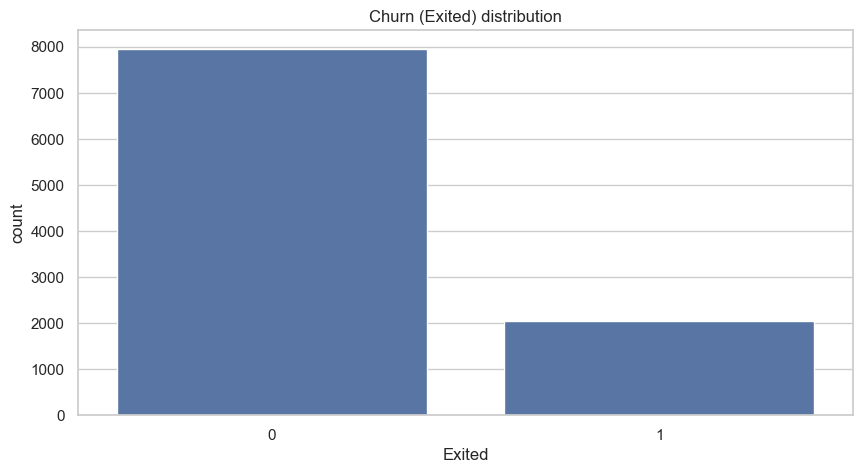

AttributeError: 'BoxPlotContainer' object has no attribute 'patches'

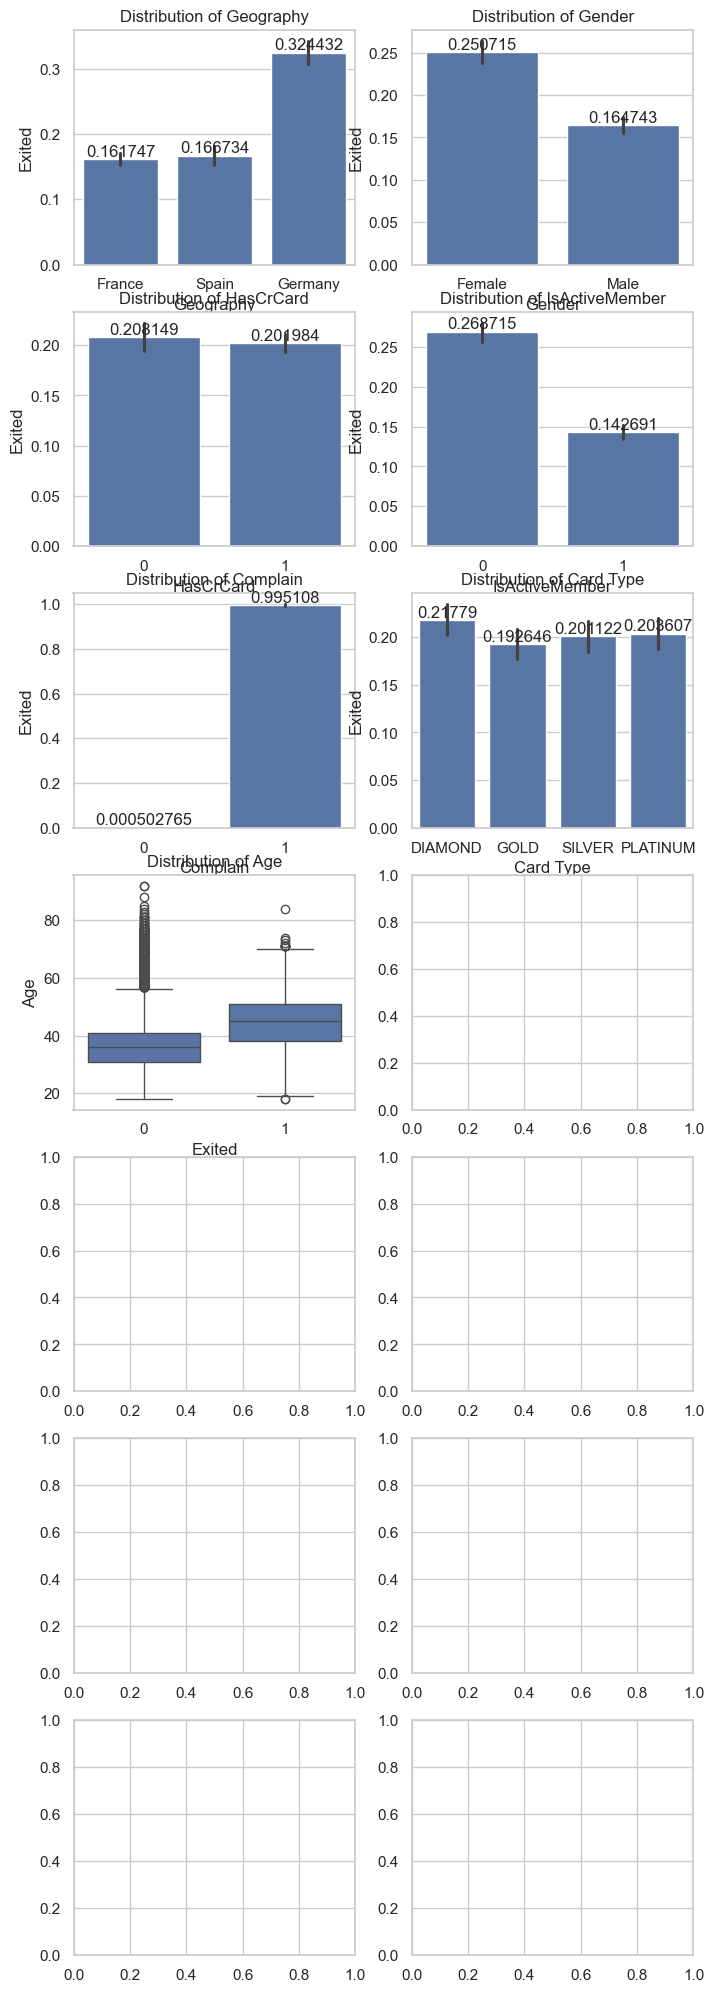

In [ ]:
# Visualize the target distribution
sns.countplot(x=df['Exited'], data=df)
plt.title("Churn (Exited) distribution")
plt.show()

# visualize churn rate of each by target
# for bar plot it tells that how many people Exited in each category (in term of average)
# for box plot it tells that how the distribution of numeric feature is for each category of target
fig, axes = plt.subplots(7, 2, figsize=(8, 25))

barlot = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']
boxlot = ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

for i in barlot:
    sns.barplot(x=i, y='Exited', data=df, ax=axes[barlot.index(i)//2, barlot.index(i)%2])
    axes[barlot.index(i)//2, barlot.index(i)%2].set_title(f"Distribution of {i}")
    axes[barlot.index(i)//2, barlot.index(i)%2].bar_label(axes[barlot.index(i)//2, barlot.index(i)%2].containers[0])

for j in boxlot:
    sns.boxplot(x='Exited', y=j, data=df, ax=axes[3 + boxlot.index(j)//2, boxlot.index(j)%2])
    axes[3 + boxlot.index(j)//2, boxlot.index(j)%2].set_title(f"Distribution of {j}")

plt.tight_layout()
plt.show()


In [18]:
from sklearn.feature_selection import mutual_info_classif
X = pd.get_dummies(df.drop(columns=['Exited','CustomerId','Surname','RowNumber']), drop_first=True)
y = df['Exited']
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series.head(20))

Complain              0.495508
Age                   0.075299
NumOfProducts         0.069057
IsActiveMember        0.018010
Geography_Germany     0.013719
Balance               0.009199
Card Type_PLATINUM    0.007378
Gender_Male           0.006216
CreditScore           0.003967
Card Type_GOLD        0.003177
Geography_Spain       0.003042
EstimatedSalary       0.002705
Satisfaction Score    0.000867
HasCrCard             0.000000
Tenure                0.000000
Point Earned          0.000000
Card Type_SILVER      0.000000
dtype: float64


baseline ROC-AUC: 0.9990502720150773


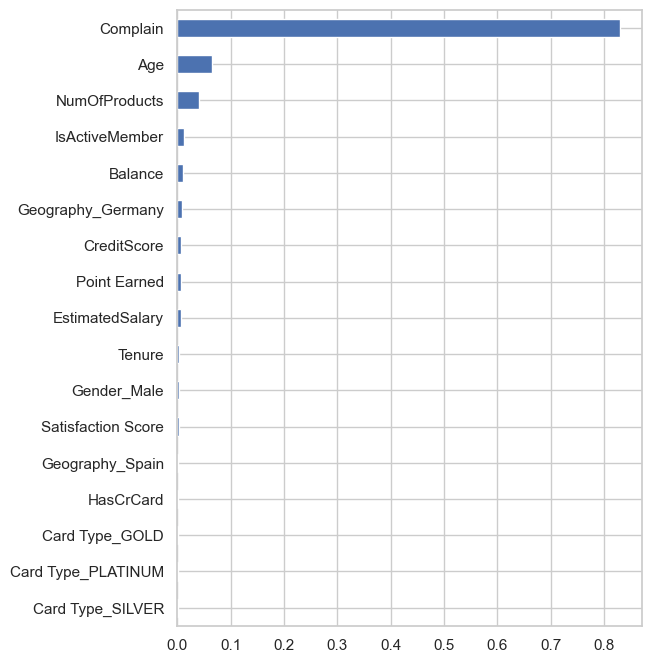

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print("baseline ROC-AUC:", scores.mean())

rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(20).plot.barh(figsize=(6,8))
plt.gca().invert_yaxis()
plt.show()

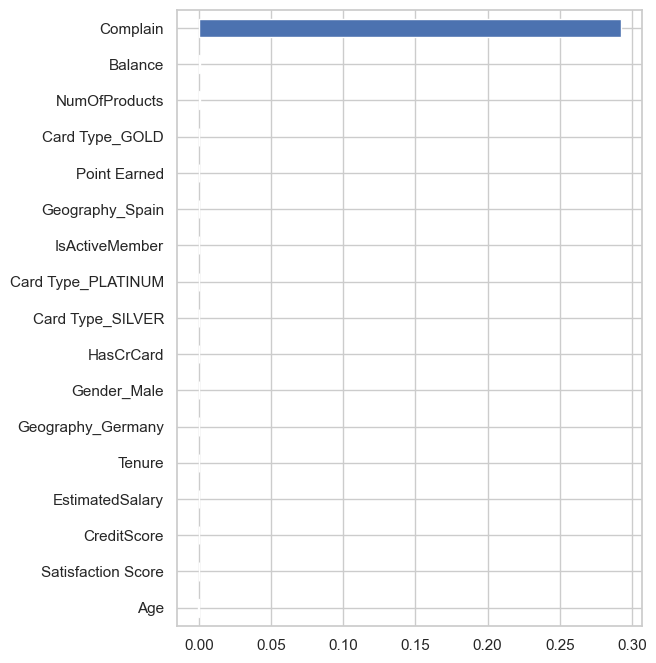

In [52]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
rf.fit(X_train, y_train)

res = permutation_importance(rf, X_val, y_val, scoring='roc_auc', n_repeats=20, random_state=42, n_jobs=-1)
perm = pd.Series(res.importances_mean, index=X.columns).sort_values(ascending=False)
perm.head(20).plot.barh(figsize=(6,8))
plt.gca().invert_yaxis()
plt.show()

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=500, solver='liblinear')
selector = RFE(lr, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selected = X.columns[selector.support_]
print("Selected by RFE:", list(selected))
# validate performance with only selected features
score = cross_val_score(lr, X[selected], y, cv=5, scoring='roc_auc').mean()
print("ROC-AUC with selected features:", score)

Selected by RFE: ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Geography_Spain', 'Gender_Male', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']
ROC-AUC with selected features: 0.999138029143318


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
sfm = SelectFromModel(lr_l1).fit(X, y)
mask = sfm.get_support()
print("L1 selected features:", X.columns[mask].tolist())

L1 selected features: ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Point Earned', 'Geography_Germany', 'Gender_Male', 'Card Type_GOLD', 'Card Type_PLATINUM']


In [55]:
from sklearn.model_selection import cross_val_score
base_score = cross_val_score(rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1).mean()
print("Baseline:", base_score)

def ablation_score(X, y, drop_cols):
    X2 = X.drop(columns=drop_cols)
    return cross_val_score(rf, X2, y, cv=5, scoring='roc_auc', n_jobs=-1).mean()

# test top 10 features from permutation list
top10 = perm.index[:10].tolist()
for f in top10:
    s = ablation_score(X, y, [f])
    print(f, "->", s, "drop:", base_score - s)

Baseline: 0.9990502720150773
Complain -> 0.8543248457628824 drop: 0.14472542625219498
Balance -> 0.9989174620032596 drop: 0.0001328100118177522
NumOfProducts -> 0.9994971275424593 drop: -0.0004468555273819952
Card Type_GOLD -> 0.9991753966422532 drop: -0.00012512462717584327
Point Earned -> 0.9992518349903324 drop: -0.00020156297525508737
Geography_Spain -> 0.999515986155792 drop: -0.0004657141407146126
IsActiveMember -> 0.9991866329017641 drop: -0.0001363608866867816
Card Type_PLATINUM -> 0.9992123745155478 drop: -0.00016210250047044017
Card Type_SILVER -> 0.9993361799457018 drop: -0.00028590793062444053
HasCrCard -> 0.9994649521709909 drop: -0.00041468015591350493


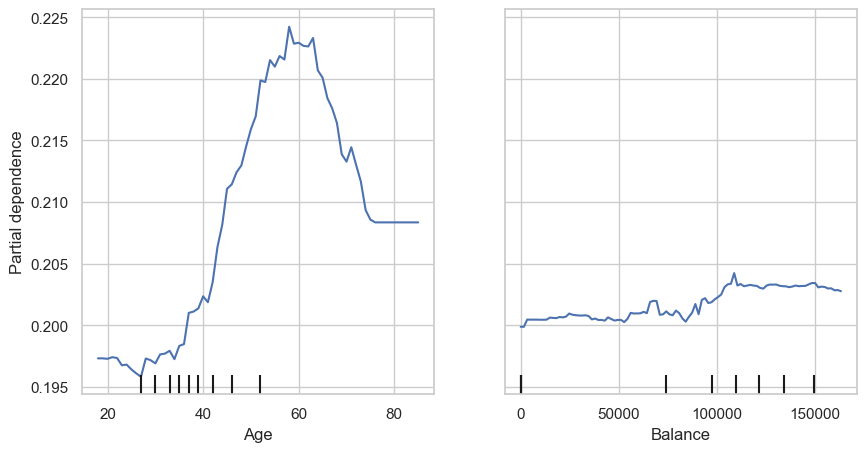

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(rf, X_val, features=['Age','Balance'])
plt.show()